# Create Neural Network for Image Inversion with numpy

## I. Read training data

In [37]:
import numpy as np
from PIL import Image
from scipy import misc
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [18]:
# Convert PIL image to array normalised to 0 to 1 rage.
max_color = 255.
def image_2_array(filename):
    pil_img=Image.open(filename)
    pil_arr=np.array(pil_img)
    pil_scaled_arr = (pil_arr / max_color)
    return pil_img, pil_scaled_arr

# Invert grayscale PIL image
def invert_array(arr):
    inverted_arr = 1 - arr
    return inverted_arr
    
# Convert normalized array to PIL image
def array_2_image(arr):
    arr_scaled = (arr) * max_color
    im = Image.fromarray(arr_scaled)
    return im

In [22]:
# Read training images into array of shape (m_samples, imsize, imsize, 1)
train_data_onedimension = np.array([])
train_labl_onedimension = np.array([])
DIR="imgset20x20x1000"
imsize=20
orig_pattern = DIR + "/origin*"
invr_pattern = DIR + "/inverse*"
import glob
for f in glob.glob(orig_pattern):
    img,a = image_2_array(f)
    train_data_onedimension = np.append(train_data_onedimension,a)
for f in glob.glob(invr_pattern):
    img,a = image_2_array(f)
    train_labl_onedimension = np.append(train_labl_onedimension,a)

print train_data_onedimension.shape
print train_labl_onedimension.shape

(400000,)
(400000,)


In [26]:
m_samples = train_data_onedimension.shape[0] / imsize / imsize
train_data = train_data_onedimension.reshape(m_samples, imsize, imsize, 1)
train_labl = train_labl_onedimension.reshape(m_samples, imsize, imsize, 1)
print train_data[:2,:2,:2]
print train_labl.shape


[[[[ 0.00392157]
   [ 0.00392157]]

  [[ 0.00392157]
   [ 0.00392157]]]


 [[[ 0.63137255]
   [ 0.63137255]]

  [[ 0.63137255]
   [ 0.00392157]]]]
(1000, 20, 20, 1)


In [27]:
# Split data between training and test sets 700 : 300
TEST_SIZE = 300
TRAINING_SIZE = m_samples - TEST_SIZE

test_data  = train_data[:TEST_SIZE,:,:,:]
train_data = train_data[TEST_SIZE:,:,:,:]

test_labl  = train_labl[:TEST_SIZE,:,:,:]
train_labl = train_labl[TEST_SIZE:,:,:,:]
print("Dataset dimensions:")
print train_data.shape
print train_labl.shape
print test_data.shape
print test_labl.shape
diff_matr = train_data[1]-train_labl[1]
print diff_matr[:2,:2,:]

x = np.array(train_data.reshape(train_data.shape[0],imsize*imsize))
y = np.array(train_labl.reshape(train_labl.shape[0],imsize*imsize))

Dataset dimensions:
(700, 20, 20, 1)
(700, 20, 20, 1)
(300, 20, 20, 1)
(300, 20, 20, 1)
[[[ 0.41568627]
  [ 0.41568627]]

 [[ 0.41568627]
  [ 0.41568627]]]


In [28]:
class NN(object):
    def __init__(self):
        self.inputSize = imsize*imsize
        self.outputSize = imsize*imsize
        
        self.W1 = np.random.random((self.inputSize, self.outputSize))
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.h = self.sigmoid(self.z2)
        return self.h
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

(700, 400)


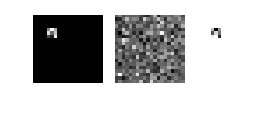

In [71]:
nn = NN()
print x.shape
h = nn.forward(x)
img_x= x[0].reshape(imsize,imsize)
img_y= y[0].reshape(imsize,imsize)
img_h= h[0].reshape(imsize,imsize)

fig = plt.figure(figsize=(3,1))
a=fig.add_subplot(1,3,1)
a.set_axis_off()
plt.imshow(img_x, cmap=plt.cm.Greys,  interpolation="nearest")
a=fig.add_subplot(1,3,2)
a.set_axis_off()
plt.imshow(img_h, cmap=plt.cm.Greys,  interpolation="nearest")
a=fig.add_subplot(1,3,3)
a.set_axis_off()
plt.imshow(img_y, cmap=plt.cm.Greys,  interpolation="nearest")
plt.show()

## II. Initialise weights

In [72]:
# layer sizes
s = np.array([imsize*imsize, imsize*imsize])
W = np.random.random((s[0], s[1]))

In [73]:
print W.shape
print W

(400, 400)
[[ 0.1928801   0.87029738  0.38892222 ...,  0.06760657  0.48332546
   0.94722123]
 [ 0.7483714   0.46491659  0.25608035 ...,  0.59975502  0.133519
   0.65887235]
 [ 0.83701771  0.84845841  0.67469332 ...,  0.38857074  0.47186238
   0.20112699]
 ..., 
 [ 0.18833998  0.83116668  0.76790721 ...,  0.37893057  0.64990832
   0.77142127]
 [ 0.56749121  0.16181551  0.23597125 ...,  0.36973964  0.64557338
   0.29119569]
 [ 0.84682755  0.09314069  0.75699106 ...,  0.95976935  0.03262663
   0.12376661]]


## III. Cost function and hypothesis

$J = \frac{1}{2} \sum\limits_{i=1}^{imsize*imsize} (h_{i} - y_{i})^2 $

$h = g(Wx)$

In [74]:
def loss(h, y):
    J = sum((h - y)*(h - y)) / 2
    return J

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoidPrime(z):
    # Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

def hypothesis(x, W):
    y = sigmoid(np.dot(x, W))
    return y

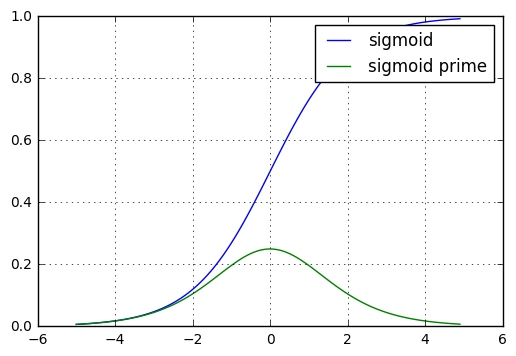

In [75]:
test_v = np.arange(-5,5,0.1)
plt.plot(test_v, sigmoid(test_v))
plt.plot(test_v, sigmoidPrime(test_v))
plt.grid(1)
plt.legend(["sigmoid","sigmoid prime"])

## IV. Training

In [82]:
iterations = 1

Dlt = np.zeros(s[0],s[1])
for iter in xrange(iterations):
    # Forward propagation
    h = hypothesis(x, W)
    J = loss(h, y)
    print sum(J)
    # Backward propagation
    l1_delta = y - h
    l0_delta = np.dot(l1_delta,W)* h * (1 - h)


125232.168772


In [18]:
# Test array operations
a = np.array([[ 1., 2.], [2., 3.]])
b = np.array([[ 2., 2.], [2., 2.]])

In [45]:
print(a*b)
print ".."
print(a*a)
print(sum(a*a))
print"-----"
print(sum((b - a)*(b - a)))

[[ 2.  4.]
 [ 4.  6.]]
..
[[ 1.  4.]
 [ 4.  9.]]
[  5.  13.]
-----
[ 1.  1.]
